# Working on Vesta features

Let's suppose most feature engineering has been done already in the *V* columns, let's :

1. PCA / TSNE / UMAP
2. AE / DAE / VAE

Links

- [PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
- [In Depth: Principal Component Analysis
](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
- [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
- [Denoising Autoencoder: Part III – Practical implementation in Representation Learning](http://dkopczyk.quantee.co.uk/dae-part3/)
- [1st place with representation learning](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/44629)
- [Dimensionality reduction using Keras Auto Encoder](https://www.kaggle.com/saivarunk/dimensionality-reduction-using-keras-auto-encoder)

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

from src.dataset.make_dataset import Dataset
from src.features.vesta_transformer import VestaTransformer
from src.visualization.visualize import plot_joint

pd.options.display.max_rows = 100
pd.options.display.max_columns = None

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Plots look better and clearer in svg format but much more heavy
%config InlineBackend.figure_format = 'png' #'svg'

# Some aesthetic settings
plt.style.use('bmh')
sns.set(style = 'whitegrid', font_scale = 0.8, rc={"grid.linewidth": 0.5, "lines.linewidth": 1})

In [3]:
ds = Dataset()
ds.load_dataset()

## Build data

As a first, study only those feature engineered features

In [4]:
V_cols = VestaTransformer().V_features
V_groups = VestaTransformer().V_groups
print(f'We have {len(V_cols)} VESTA engineered columns')

We have 339 VESTA engineered columns


In [5]:
X_train = ds.X_train[V_cols].astype('float32')
X_test = ds.X_test[V_cols].astype('float32')
y_train = ds.y_train.reset_index()['isFraud']

## PCA

In [6]:
def reduce_pca(X_train):
    # Mostly counts so remove those
    X_train[np.isnan(X_train)] = -1

    pca = PCA(n_components=2, random_state=42)
    X_train = StandardScaler().fit_transform(X_train)
    principalComponents = pca.fit_transform(X_train)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, y_train], axis = 1)
    return finalDf

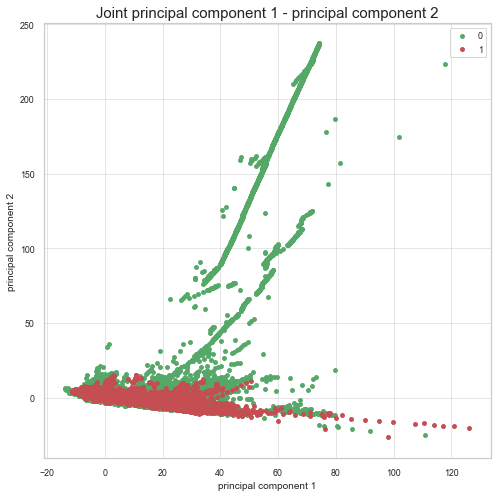

In [7]:
plot_joint(reduce_pca(X_train), 'principal component 1', 'principal component 2')
plt.show()

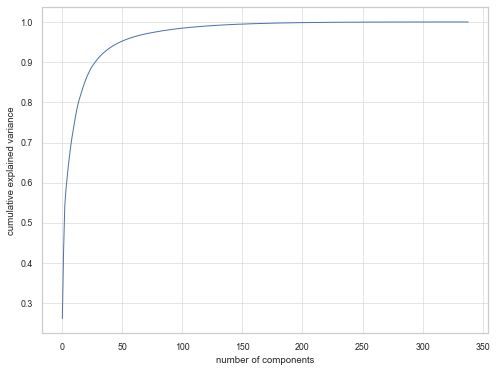

In [13]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(np.cumsum(PCA().fit(X_train).explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
fig.show()

### Reducing all Vs may lose info, let's subgroup

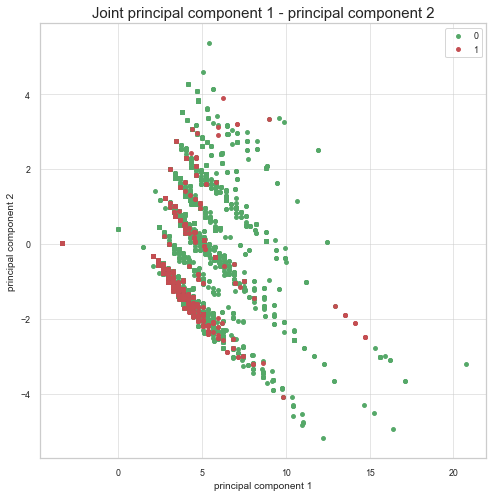

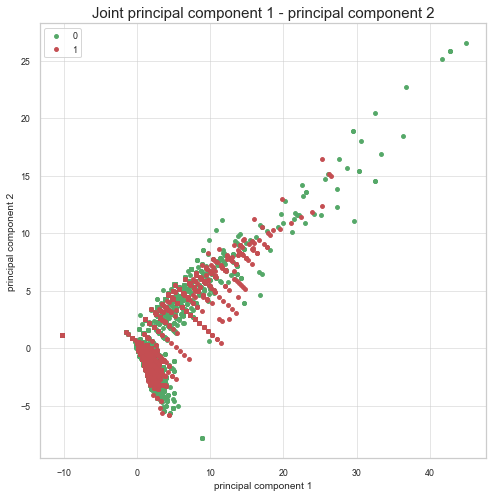

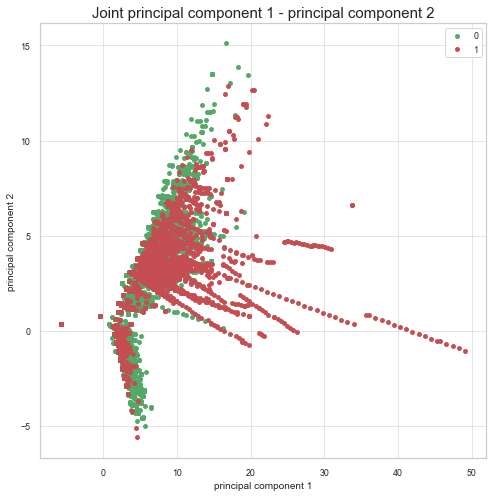

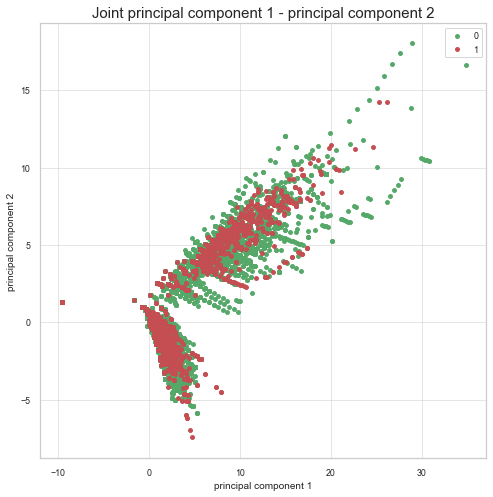

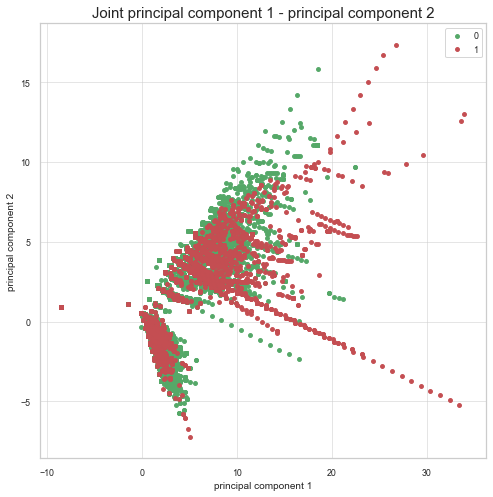

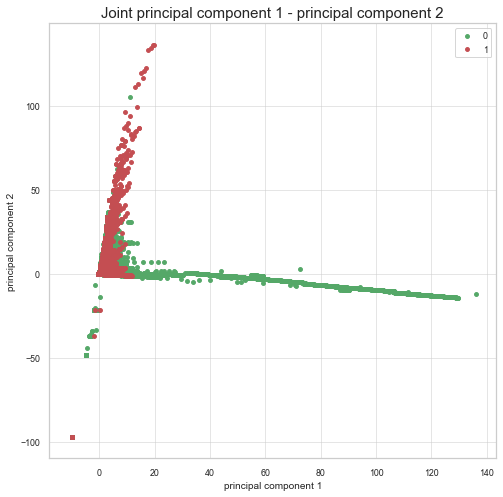

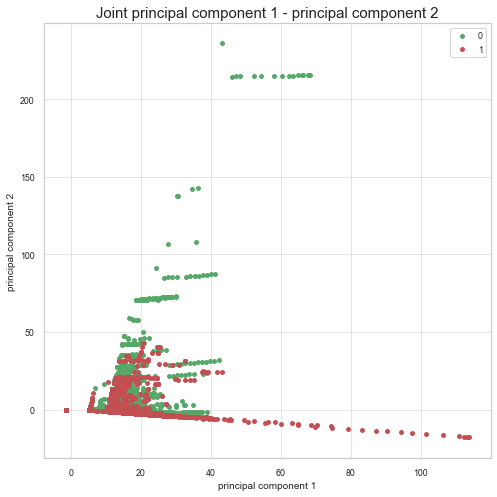

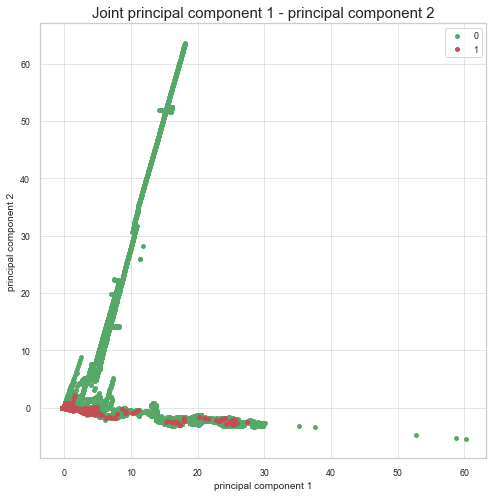

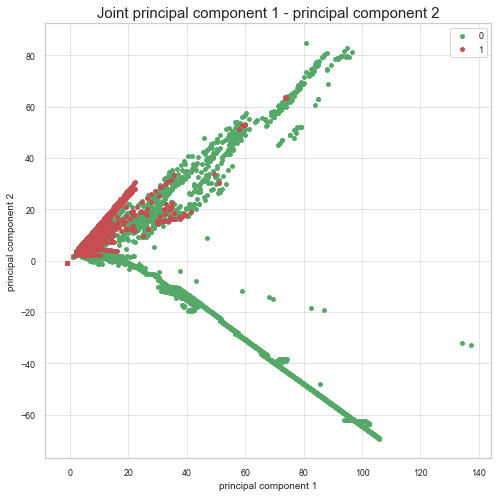

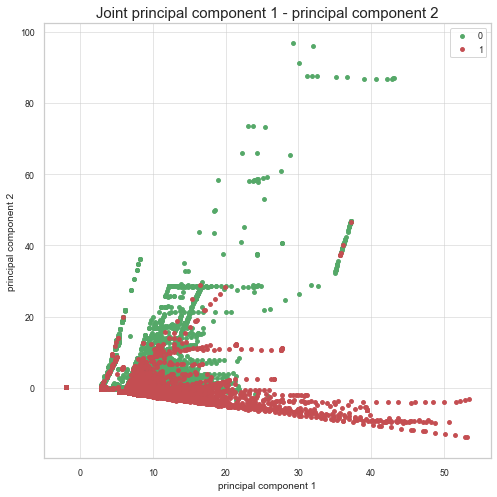

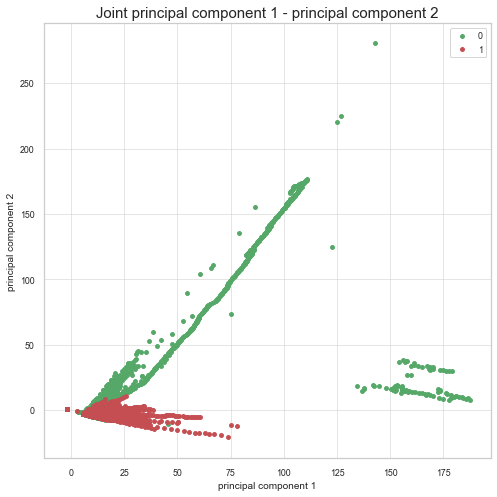

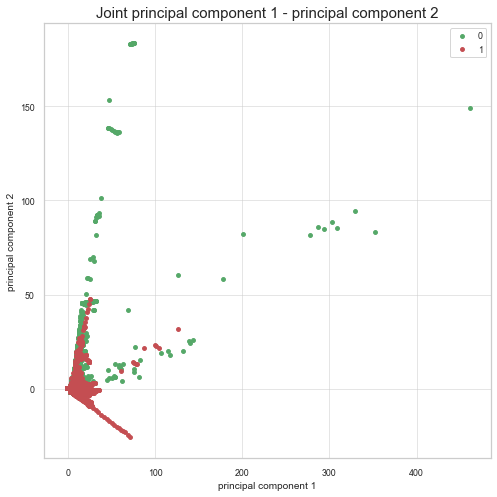

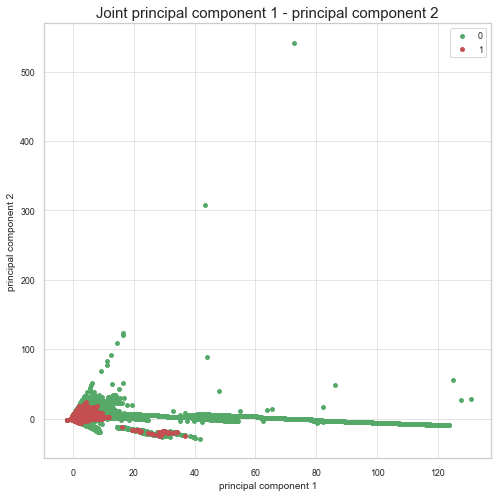

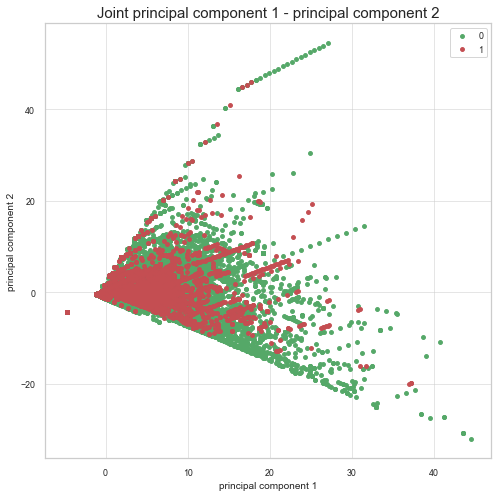

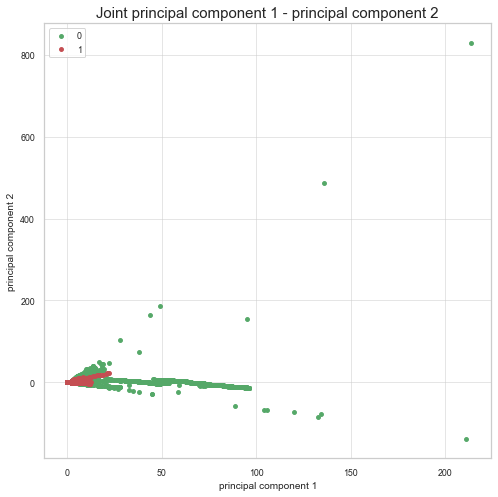

In [39]:
for group in VestaTransformer().V_groups:
    plot_joint(reduce_pca(X_train[group]), 'principal component 1', 'principal component 2')
    plt.show()

## TSNE

Darn, it's slow, don't run on full dataset, favor UMAP

In [120]:
# ran only on 30000 elements
tsne = TSNE(n_components=2, random_state=0)
principalComponents = tsne.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_train], axis = 1)

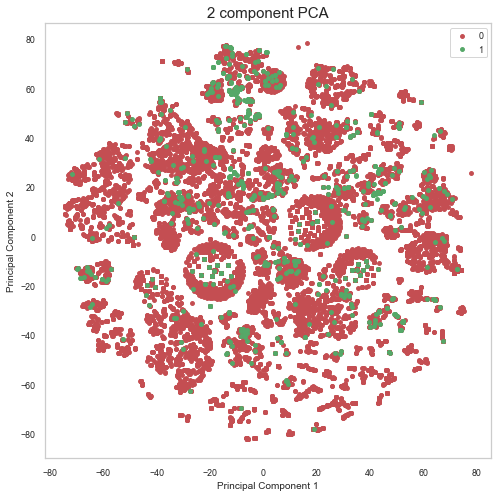

In [121]:
plot_joint(finalDf, 'principal component 1', 'principal component 2')

## UMAP

In [7]:
def reduce_umap(X_train):
    reducer = umap.UMAP(random_state=42)
    X_train = StandardScaler().fit_transform(X_train)
    principalComponents = reducer.fit_transform(X_train)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, y_train], axis = 1)
    return finalDf

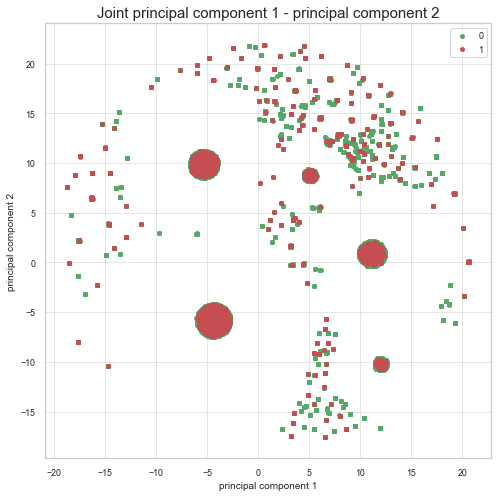

In [ ]:
for group in VestaTransformer().V_groups:
    plot_joint(reduce_umap(X_train[group]), 'principal component 1', 'principal component 2')
    plt.show()

#### Supervised UMAP

In [ ]:
def reduce_umap_supervised(X_train, y_train):
    reducer = umap.UMAP(random_state=42)
    X_train = StandardScaler().fit_transform(X_train)
    principalComponents = reducer.fit_transform(X_train, y_train=y_train)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, y_train], axis = 1)
    return finalDf

In [ ]:
for group in VestaTransformer().V_groups:
    plot_joint(reduce_umap_supervised(X_train[group]), 'principal component 1', 'principal component 2')
    plt.show()

## Test implementation in VestaTransformer

In [5]:
vt = VestaTransformer()
vt.fit(ds.X_train)

VestaTransformer()

In [6]:
X_reduced = vt.transform(ds.X_train)

In [7]:
X_reduced.head(5)

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,has_identity,Vgroup_0_0,Vgroup_1_0,Vgroup_1_1,Vgroup_1_2,Vgroup_1_3,Vgroup_1_4,Vgroup_2_0,Vgroup_2_1,Vgroup_2_2,Vgroup_2_3,Vgroup_3_0,Vgroup_3_1,Vgroup_3_2,Vgroup_3_3,Vgroup_3_4,Vgroup_4_0,Vgroup_4_1,Vgroup_4_2,Vgroup_4_3,Vgroup_4_4,Vgroup_4_5,Vgroup_5_0,Vgroup_6_0,Vgroup_7_0,Vgroup_8_0,Vgroup_8_1,Vgroup_9_0,Vgroup_9_1,Vgroup_10_0,Vgroup_10_1,Vgroup_10_2,Vgroup_11_0,Vgroup_12_0,Vgroup_13_0,Vgroup_13_1,Vgroup_14_0
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,None,None,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,0,2.771531,0.785742,-0.434492,-0.848001,0.078706,-0.056282,-4.962507,0.240228,0.187546,0.022062,0.726355,-0.458788,0.807388,-0.213112,-0.009254,0.299193,-0.292108,0.610606,-0.316362,1.115961,0.061924,-368.053608,-1.614387,-6602.835423,-399.980175,-38.651451,-9.349977,-2.082203,-73.826973,2.561444,-1.939330,-3.994949,-449.181704,-55.099324,-0.979240,-260.292524
2987001,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,None,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,None,None,None,M0,T,T,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,0,-3.355114,0.366811,0.292083,-0.111396,0.678359,0.529668,1.240309,0.322513,0.185096,0.088827,0.324985,0.305536,0.146361,0.024540,0.702991,0.423934,0.354077,0.153158,-0.008868,-0.666072,0.292194,-490.374783,-1.614387,-6602.835423,-399.980175,-38.651451,-9.349977,-2.082203,-73.826973,2.561444,-1.939330,-3.994949,-573.821177,-55.099324,-0.979240,-260.292524
2987002,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,None,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,0,2.771531,0.785742,-0.434492,-0.848001,0.078706,-0.056282,1.650605,-0.490609,0.094406,-0.813765,0.726355,-0.458788,0.807388,-0.213112,-0.009254,0.819116,-0.431066,0.366655,-0.799471,-0.044729,-0.020617,-490.374783,-1.614387,-6602.835423,-399.980175,-38.651451,-9.349977,-2.082203,-73.826973,2.561444,-1.939330,-3.994949,-573.821177,-55.099324,-0.979240,-260.292524
2987003,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,None,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,None,None,None,M0,T,F,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,0,-3.355114,0.785742,-0.434492,-0.848001,0.078706,-0.056282,1.650605,-0.490609,0.094406,-0.813765,0.726355,-0.458788,0.807388,-0.213112,-0.009254,0.819116,-0.431066,

## Autoencoder

In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(X_train.shape)

In [32]:
# this is the size of our encoded representations
encoding_dim = 128

# this is our input placeholder
input_layer = Input(shape=(len(V_cols),), name='input_layer')
x = Dense(256, activation='relu')(input_layer)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', name='encoded_layer')(x)
x = Dense(256, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(len(V_cols), activation='sigmoid', name='decoded_layer')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoded)
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 339)]             0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               87040     
_________________________________________________________________
encoded_layer (Dense)        (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
decoded_layer (Dense)        (None, 339)               87123     
Total params: 240,083
Trainable params: 240,083
Non-trainable params: 0
_________________________________________________________________


In [33]:
# this model maps an input to its encoded representation
encoder = Model(input_layer, encoded)

In [36]:
# create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.get_layer('encoded_layer')
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

ValueError: Input 0 of layer encoded_layer is incompatible with the layer: expected axis -1 of input shape to have value 256 but received input with shape [None, 128]

In [26]:
autoencoder.compile(optimizer='adadelta', loss='mse')

In [27]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 30000 samples, validate on 30000 samples
Epoch 1/10
30000/30000 [==============================] - ETA: 12s - loss: na - ETA: 1s - loss: na - ETA: 1s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - 1s 44us/sample - loss: nan - val_loss: nan
Epoch 2/10
30000/30000 [==============================] - ETA: 1s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - 1s 41us/sample - loss: nan - val_loss: nan
Epoch 3/10
30000/30000 [==============================] - ETA: 1s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s